## Problem Description

In this problem, we want to apply a prediction model that predicts the price of hotels in NYC based on its features. Our predictor is the `price` variable and other features are mostly categorical. We want to predict the price of a hotel .So we want to check for outliers in the `price` data for our prediction to be accurate when a model is applied. Our target column `price` doesnt have any missing values.

For our problem, we are using the **NYC_2019.csv** dataset.  

First , we load our dataset "New York Housing" into a dataframe and view it.

### Load the Dataset and View data

In [1]:
import pandas as pd
nyc=pd.read_csv("../datasets/AB_NYC_2019.csv")
nyc

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Check for outliers in `price` data




### Plot a scatter plot for outlier estimation:



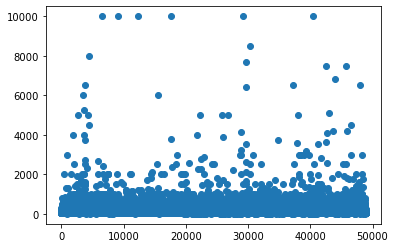

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x= nyc.index, y= nyc['price'])
plt.show()

### Use `describe()` for `price` distribution in terms of numbers:



In [14]:
nyc['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### Use `Box Plots` for outlier limit estimation:

<img src="boxplot.png"
     alt="boxplot icon"
     width="500" 
     height="300"
     style="margin-right: 10px;" />
     

In [4]:
import matplotlib.pyplot as plt

<AxesSubplot:>

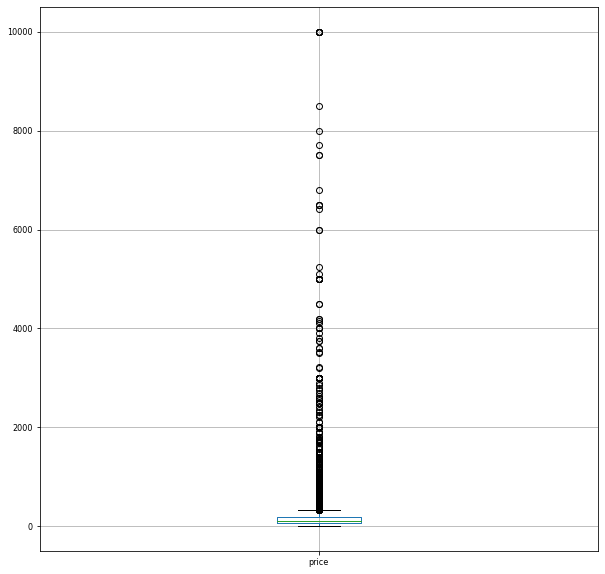

In [5]:

boxplot = nyc.boxplot(figsize = (10,10), column='price', fontsize= '8', grid =True)
boxplot

### Find the outliers:

In [16]:
## finding outliers

## find the 75th percentile value
q3=nyc['price'].quantile(0.75)

## find the 25th percentile value
q1= nyc['price'].quantile(0.25)

print("q1:",q1)
print("q3:",q3)

## find the interquartile range (IQ)
iqr= nyc['price'].quantile(0.75) - nyc['price'].quantile(0.25)
print("iqr:",iqr)

## find the upper and lower bound
upper_bound= q3 + 1.5*iqr
lower_bound= q1 - 1.5*iqr

print("upper bound",upper_bound)
print("lower bound",lower_bound)

q1: 69.0
q3: 175.0
iq: 106.0
upper bound 334.0
lower bound -90.0


## Find outlier value Quartile

In [20]:
rrth=nyc['price'].quantile(0.95)
ffth=nyc['price'].quantile(0.94)
ggth=nyc['price'].quantile(0.93)

print("95th:",rrth,"94th:",ffth,"93th:",ggth)

95th: 355.0 94th: 340.0 93th: 300.0


## Clip the Outliers:

### Clip `price` data with lower and upper limit as range:


In [21]:
nyc['price']= nyc['price'].clip(nyc['price'].quantile(0.00), nyc['price'].quantile(0.94))

In [22]:
nyc['price'].max()

340.0

In [23]:
nyc['price'].min()

0.0

## Check final clipped data:

In [25]:
nyc['price'].describe()

count    48895.000000
mean       133.343062
std         84.412427
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        340.000000
Name: price, dtype: float64

### Conclusion

By using the clipping method, we have removed our outliers from the price data. Now using this dataset will give us good predictions of hotel prices. 

## Scratch

we again look at the distribution of the price data using histogram.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

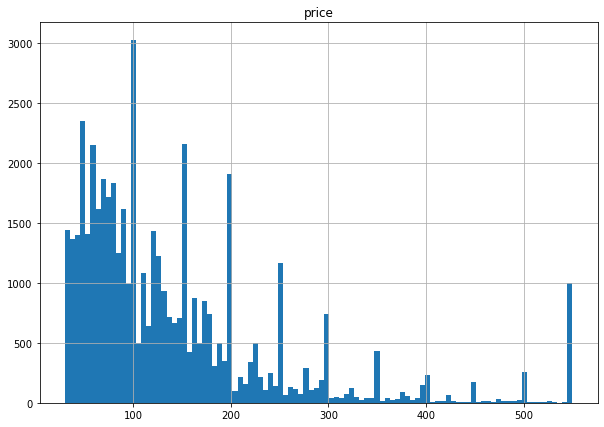

In [12]:
#hist(data=nyc['price'],bins=300)

nyc.hist(column='price',bins=100,figsize=(10,7))



We can see from the above histogram is the data is within the much smaller bound of 350 rather than 10000 as the max value. This way we have removed the outliers.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

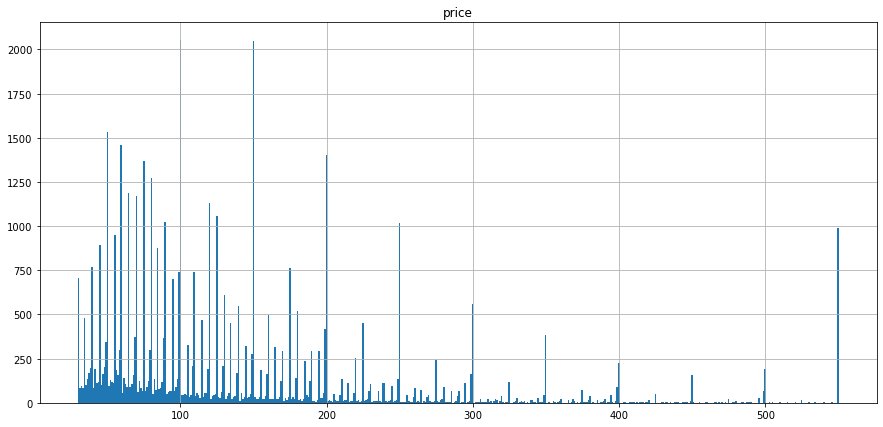

In [13]:

nyc.hist(column='price',bins=500,figsize=(15,7))
